## Breast Cancer Diagnostic - Automatically choosing the best algorithm

The goal here is to predict the diagnosis of a breast cancer, whether it is malignant or benign, depending on the values of several observations performed in cells.

## Understanding the dataset

### Attribute information

#### 1) ID number

#### 2) Diagnosis

- M = malignant
- B = benign

#### 3-32) Features (Mean, Std Err, Worst/Largest)

Ten real-valued features are computed for each cell nucleus:

- a) **radius** (mean of distances from center to points on the perimeter)
- b) **texture** (standard deviation of gray-scale values)
- c) **perimeter**
- d) **area**
- e) **smoothness** (local variation in radius lengths)
- f) **compactness** (perimeter^2 / area - 1.0)
- g) **concavity** (severity of concave portions of the contour)
- h) **concave points** (number of concave portions of the contour)
- i) **symmetry**
- j) **fractal dimension** ("coastline approximation" - 1)

The **mean**, **standard error** and **"worst" or largest** (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

### Observations

- All feature values are recoded with four significant digits.
- Missing attribute values: none.
- Class distribution: 357 benign, 212 malignant.

In [1]:
# import standard libraries for linear algebra, handling data and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 2)
sns.set(style="white", color_codes=True)

%matplotlib inline

In [2]:
# read the data into a Pandas DataFrame
data = pd.read_csv('../input/data.csv')

# show some samples
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,6.40e-03,0.05,0.05,0.02,0.03,6.19e-03,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,5.22e-03,0.01,0.02,0.01,0.01,3.53e-03,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,6.15e-03,0.04,0.04,0.02,0.02,4.57e-03,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,9.11e-03,0.07,0.06,0.02,0.06,9.21e-03,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,1.15e-02,0.02,0.06,0.02,0.02,5.11e-03,22.54,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08,NaN


In [3]:
# remove unnamed 32th column
data.drop(data.columns[32], axis=1, inplace=True)

# save identifications
ids = data['id']

# remove unnecessary id column
data.drop(['id'], axis=1, inplace=True)

In [4]:
# how many rows and columns are there in the data?
data.shape

(569, 31)

In [5]:
# which are the names of the columns and their datatypes?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [6]:
# is there any column with null values?
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
# describing numerical features
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,5.69e+02,569.00,569.00,569.00,569.00,5.69e+02,5.69e+02,569.00,5.69e+02,5.69e+02,5.69e+02,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,6.28e-02,0.41,1.22,2.87,40.34,7.04e-03,2.55e-02,0.03,1.18e-02,2.05e-02,3.79e-03,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,7.06e-03,0.28,0.55,2.02,45.49,3.00e-03,1.79e-02,0.03,6.17e-03,8.27e-03,2.65e-03,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,5.00e-02,0.11,0.36,0.76,6.80,1.71e-03,2.25e-03,0.00,0.00e+00,7.88e-03,8.95e-04,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,5.77e-02,0.23,0.83,1.61,17.85,5.17e-03,1.31e-02,0.02,7.64e-03,1.52e-02,2.25e-03,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,6.15e-02,0.32,1.11,2.29,24.53,6.38e-03,2.04e-02,0.03,1.09e-02,1.87e-02,3.19e-03,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,6.61e-02,0.48,1.47,3.36,45.19,8.15e-03,3.24e-02,0.04,1.47e-02,2.35e-02,4.56e-03,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,9.74e-02,2.87,4.88,21.98,542.20,3.11e-02,1.35e-01,0.40,5.28e-02,7.90e-02,2.98e-02,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [8]:
# describing categorical features
data.describe(include=['O'])

,diagnosis
count,569
unique,2
top,B
freq,357


In [9]:
# which are the possible values for the categorical attribute?
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# normalizing numeric values in order to avoid distortions
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
data.head()

In [11]:
# analyzing correlation between features
data.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.00e+00,3.24e-01,9.98e-01,9.87e-01,0.17,0.51,0.68,0.82,0.15,-3.12e-01,6.79e-01,-0.10,0.67,0.74,-2.23e-01,0.21,0.19,0.38,-1.04e-01,-4.26e-02,0.97,2.97e-01,9.65e-01,0.94,0.12,0.41,0.53,0.74,0.16,7.07e-03
texture_mean,3.24e-01,1.00e+00,3.30e-01,3.21e-01,-0.02,0.24,0.30,0.29,0.07,-7.64e-02,2.76e-01,0.39,0.28,0.26,6.61e-03,0.19,0.14,0.16,9.13e-03,5.45e-02,0.35,9.12e-01,3.58e-01,0.34,0.08,0.28,0.30,0.30,0.11,1.19e-01
perimeter_mean,9.98e-01,3.30e-01,1.00e+00,9.87e-01,0.21,0.56,0.72,0.85,0.18,-2.61e-01,6.92e-01,-0.09,0.69,0.74,-2.03e-01,0.25,0.23,0.41,-8.16e-02,-5.52e-03,0.97,3.03e-01,9.70e-01,0.94,0.15,0.46,0.56,0.77,0.19,5.10e-02
area_mean,9.87e-01,3.21e-01,9.87e-01,1.00e+00,0.18,0.50,0.69,0.82,0.15,-2.83e-01,7.33e-01,-0.07,0.73,0.80,-1.67e-01,0.21,0.21,0.37,-7.25e-02,-1.99e-02,0.96,2.87e-01,9.59e-01,0.96,0.12,0.39,0.51,0.72,0.14,3.74e-03
smoothness_mean,1.71e-01,-2.34e-02,2.07e-01,1.77e-01,1.00,0.66,0.52,0.55,0.56,5.85e-01,3.01e-01,0.07,0.30,0.25,3.32e-01,0.32,0.25,0.38,2.01e-01,2.84e-01,0.21,3.61e-02,2.39e-01,0.21,0.81,0.47,0.43,0.50,0.39,4.99e-01
compactness_mean,5.06e-01,2.37e-01,5.57e-01,4.99e-01,0.66,1.00,0.88,0.83,0.60,5.65e-01,4.97e-01,0.05,0.55,0.46,1.35e-01,0.74,0.57,0.64,2.30e-01,5.07e-01,0.54,2.48e-01,5.90e-01,0.51,0.57,0.87,0.82,0.82,0.51,6.87e-01
concavity_mean,6.77e-01,3.02e-01,7.16e-01,6.86e-01,0.52,0.88,1.00,0.92,0.50,3.37e-01,6.32e-01,0.08,0.66,0.62,9.86e-02,0.67,0.69,0.68,1.78e-01,4.49e-01,0.69,3.00e-01,7.30e-01,0.68,0.45,0.75,0.88,0.86,0.41,5.15e-01
concave points_mean,8.23e-01,2.93e-01,8.51e-01,8.23e-01,0.55,0.83,0.92,1.00,0.46,1.67e-01,6.98e-01,0.02,0.71,0.69,2.77e-02,0.49,0.44,0.62,9.54e-02,2.58e-01,0.83,2.93e-01,8.56e-01,0.81,0.45,0.67,0.75,0.91,0.38,3.69e-01
symmetry_mean,1.48e-01,7.14e-02,1.83e-01,1.51e-01,0.56,0.60,0.50,0.46,1.00,4.80e-01,3.03e-01,0.13,0.31,0.22,1.87e-01,0.42,0.34,0.39,4.49e-01,3.32e-01,0.19,9.07e-02,2.19e-01,0.18,0.43,0.47,0.43,0.43,0.70,4.38e-01
fractal_dimension_mean,-3.12e-01,-7.64e-02,-2.61e-01,-2.83e-01,0.58,0.57,0.34,0.17,0.48,1.00e+00,1.11e-04,0.16,0.04,-0.09,4.02e-01,0.56,0.45,0.34,3.45e-01,6.88e-01,-0.25,-5.13e-02,-2.05e-01,-0.23,0.50,0.46,0.35,0.18,0.33,7.67e-01


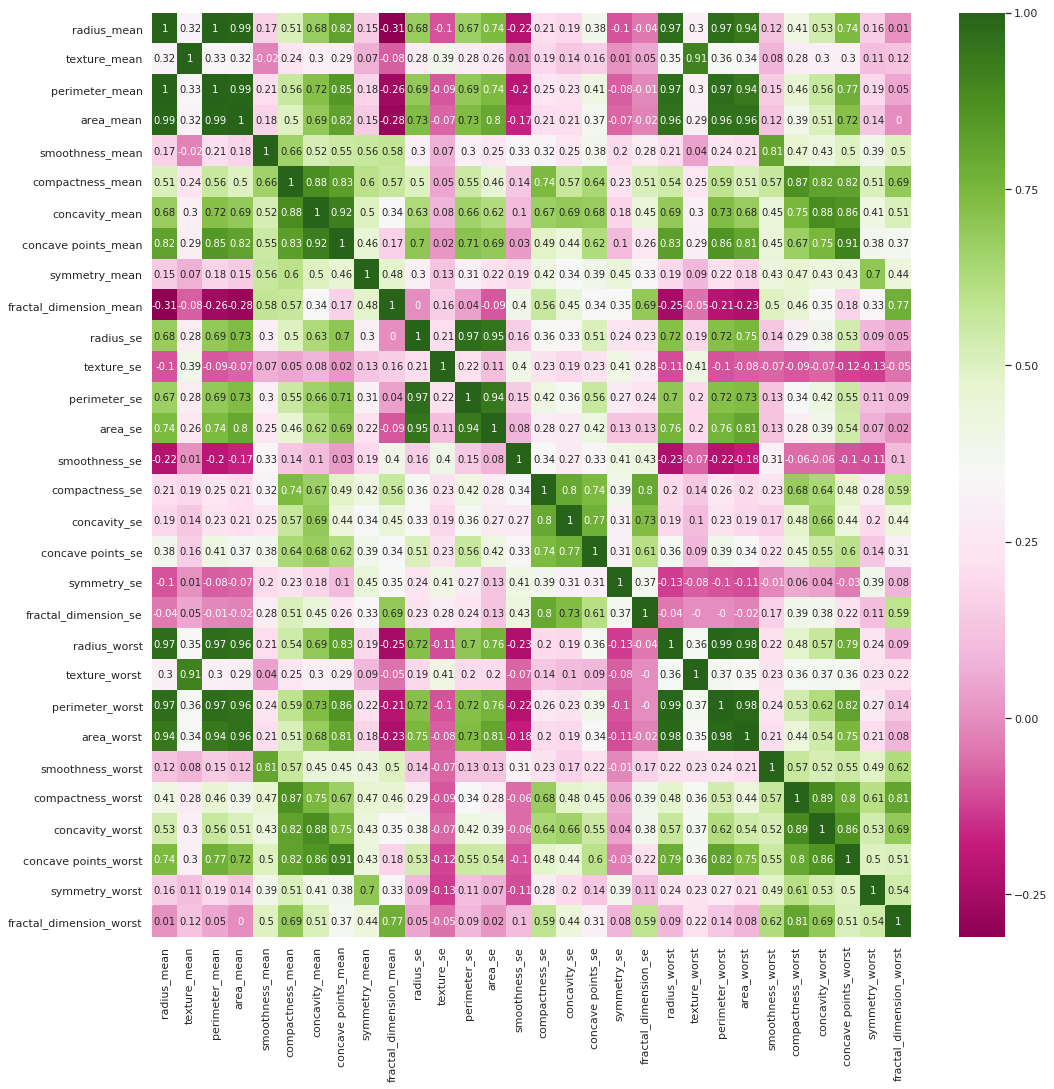

In [12]:
# plotting this correlation between features
fig, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(data=data.corr().round(2), annot=True, cmap="PiYG", ax=ax)

There are so many features. Therefore, pair plotting all of them isn't a good idea. Let's do it by each 10 sets.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


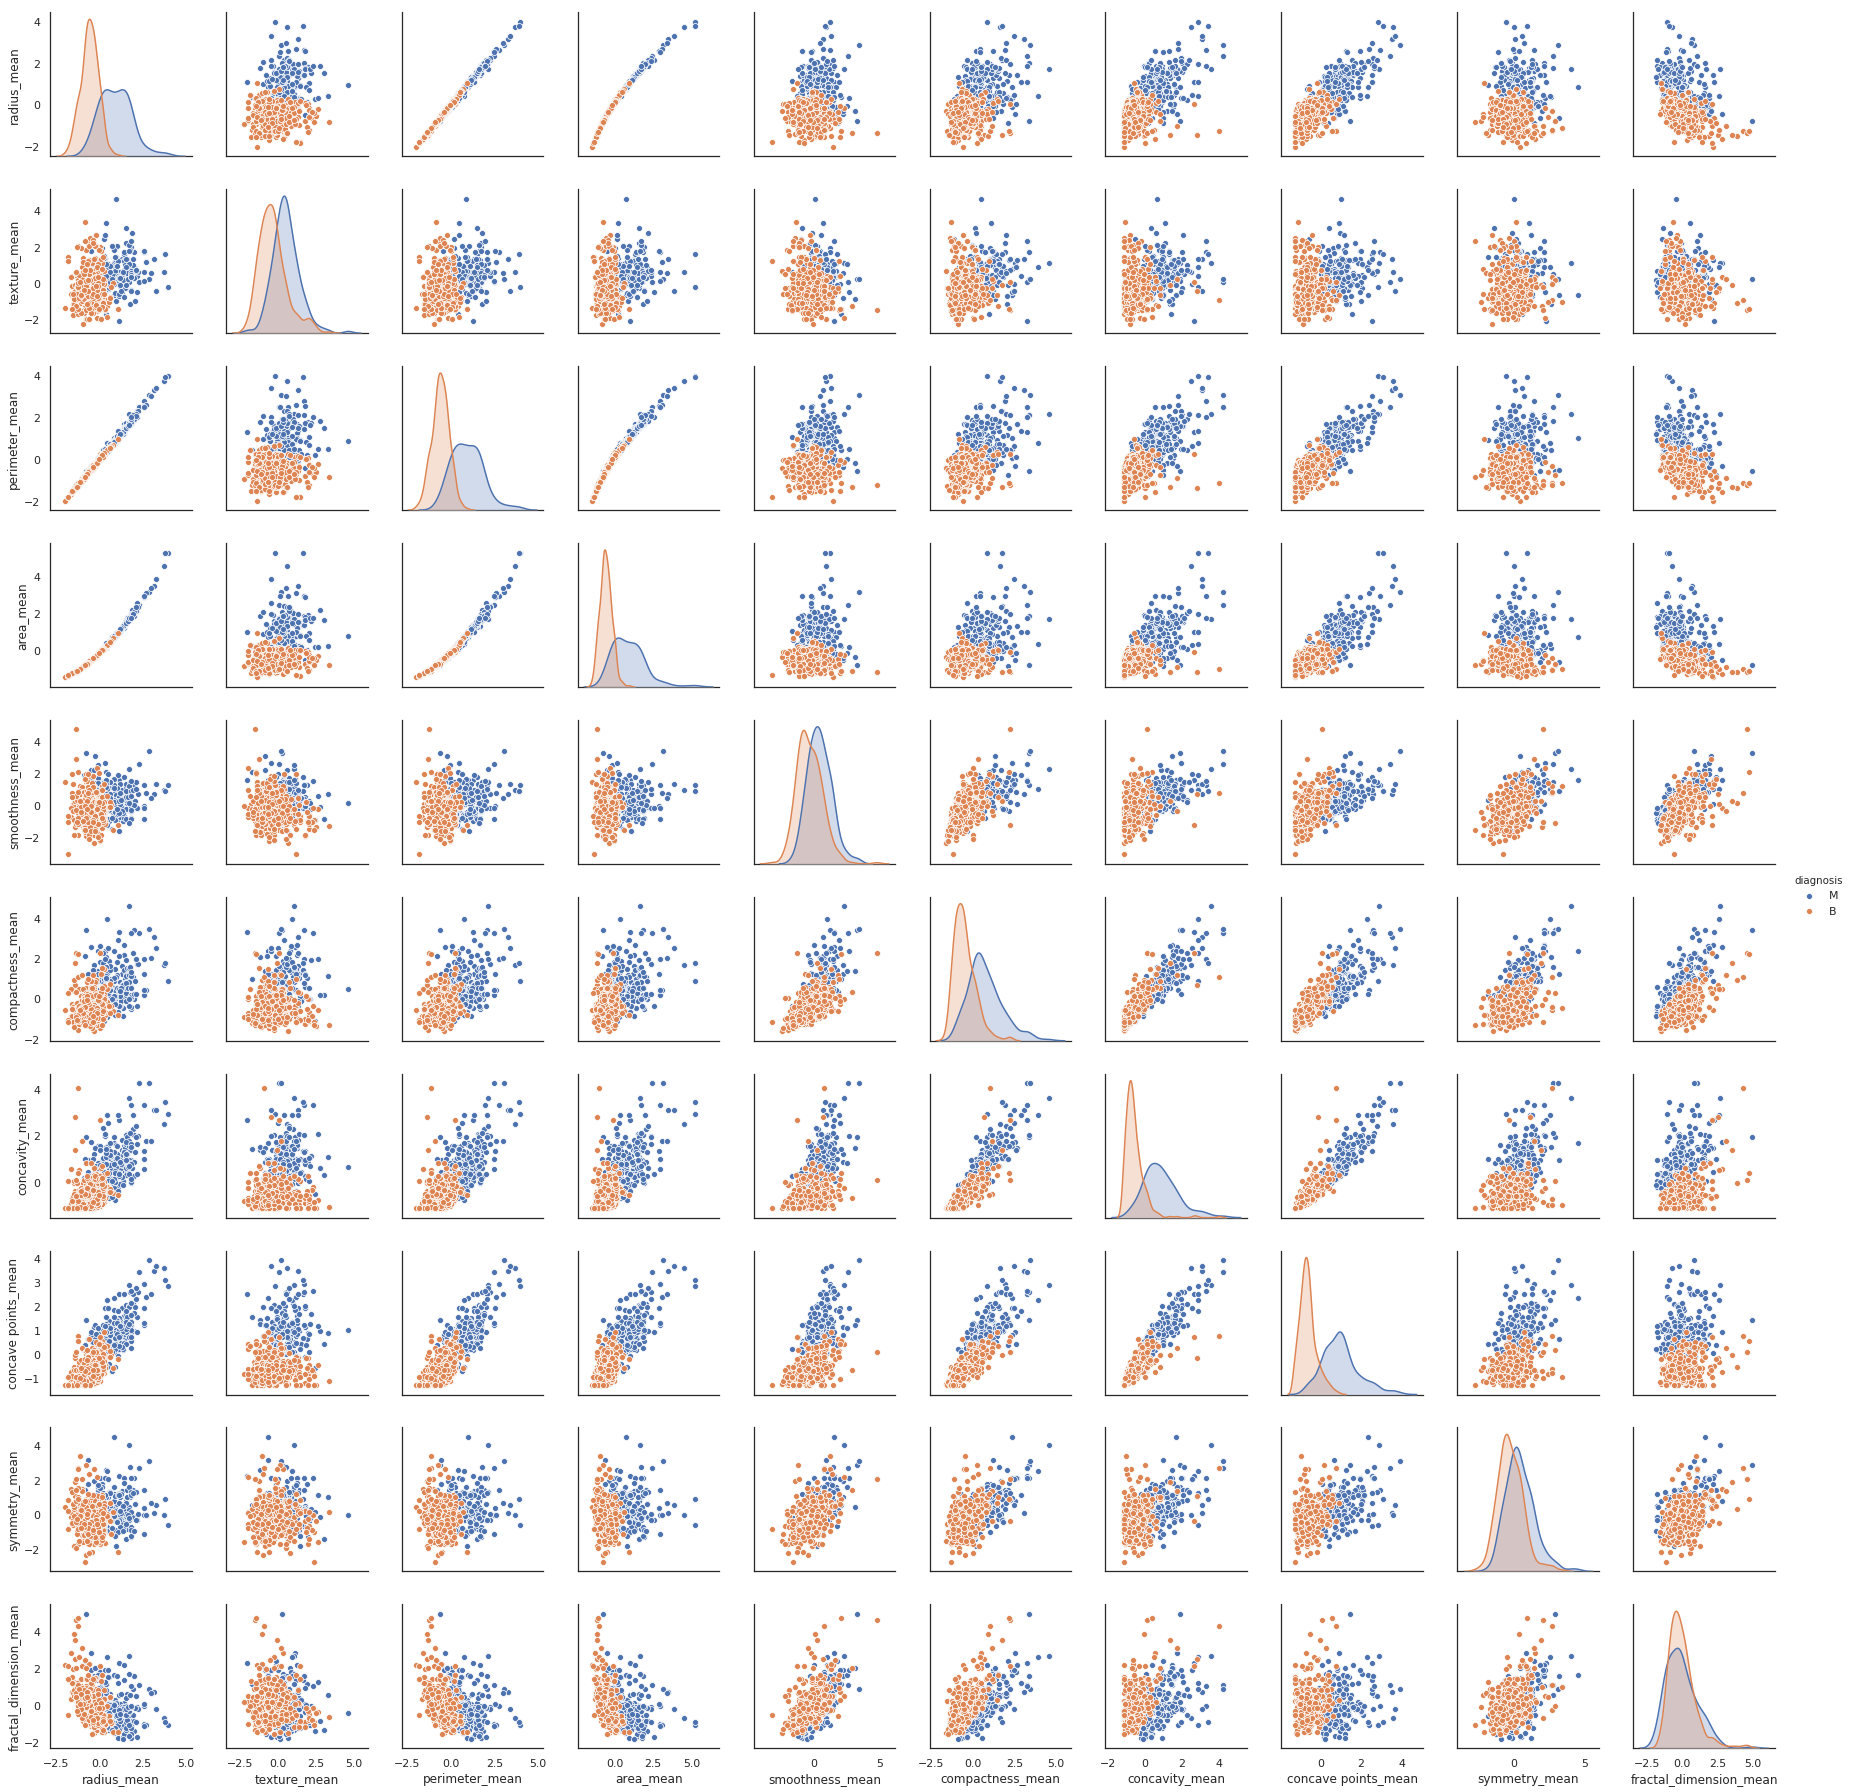

In [13]:
# pair plot diagnosis + 10 features (mean)
sns.pairplot(data=data.iloc[:,0:11], hue='diagnosis', diag_kind='kde')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


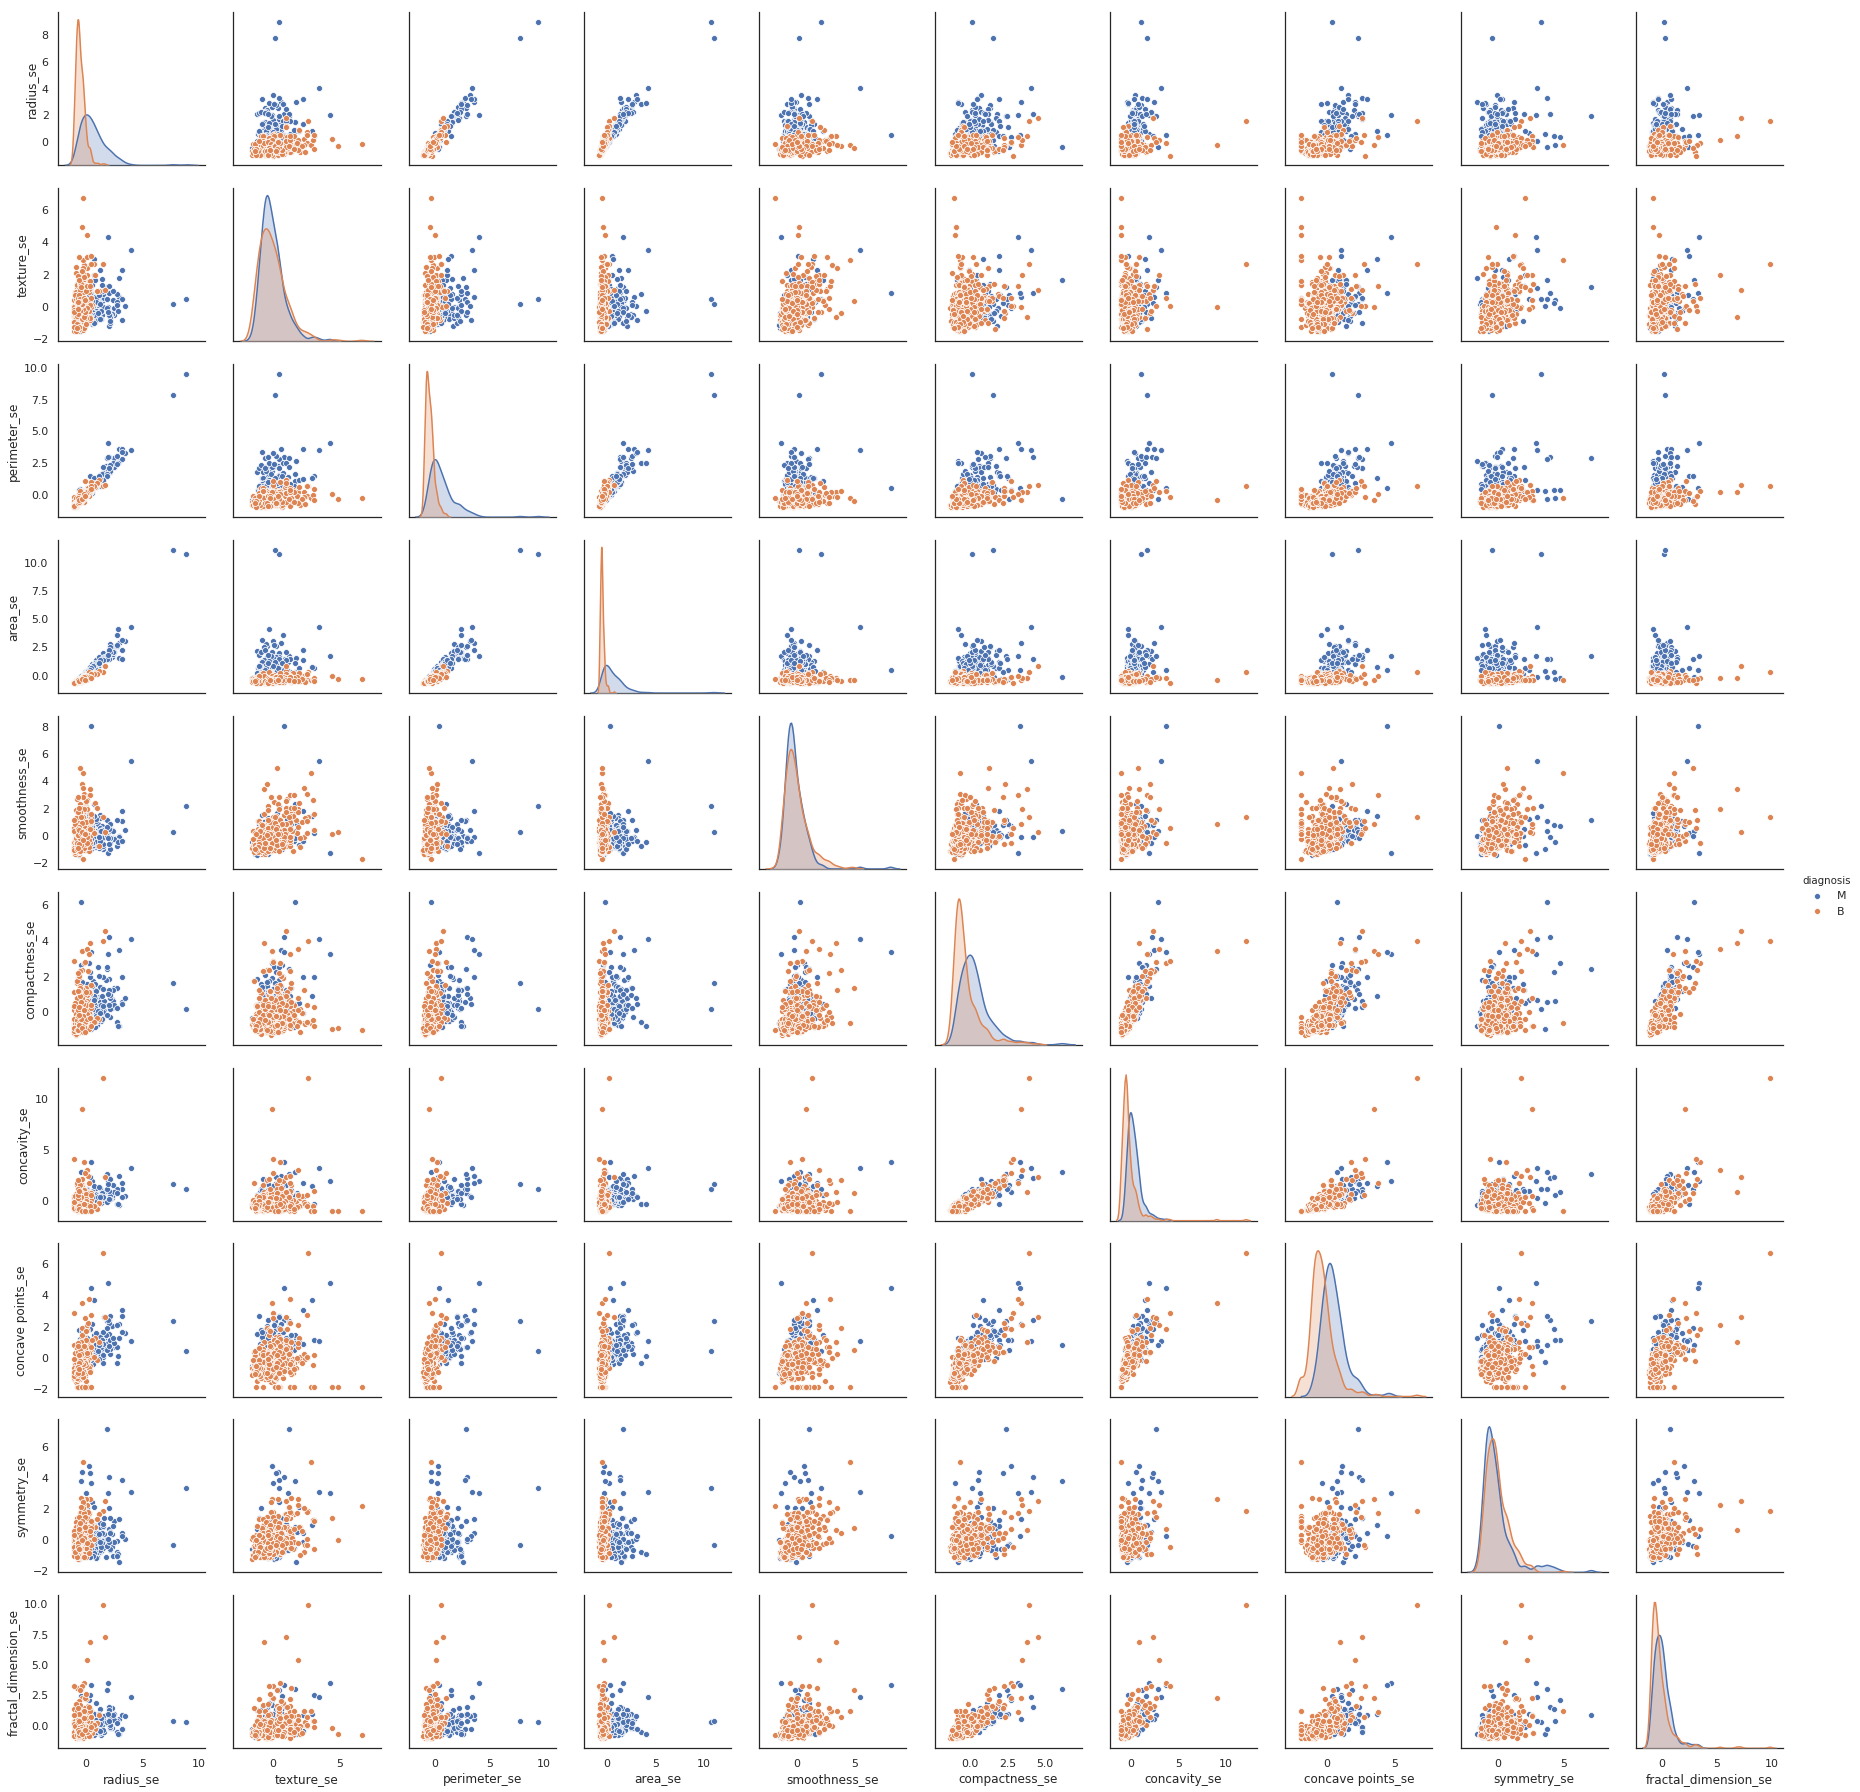

In [14]:
# pair plot diagnosis + 10 features (std error)
sns.pairplot(data=data.iloc[:,np.append([0],np.arange(11,21))], hue='diagnosis', diag_kind='kde')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


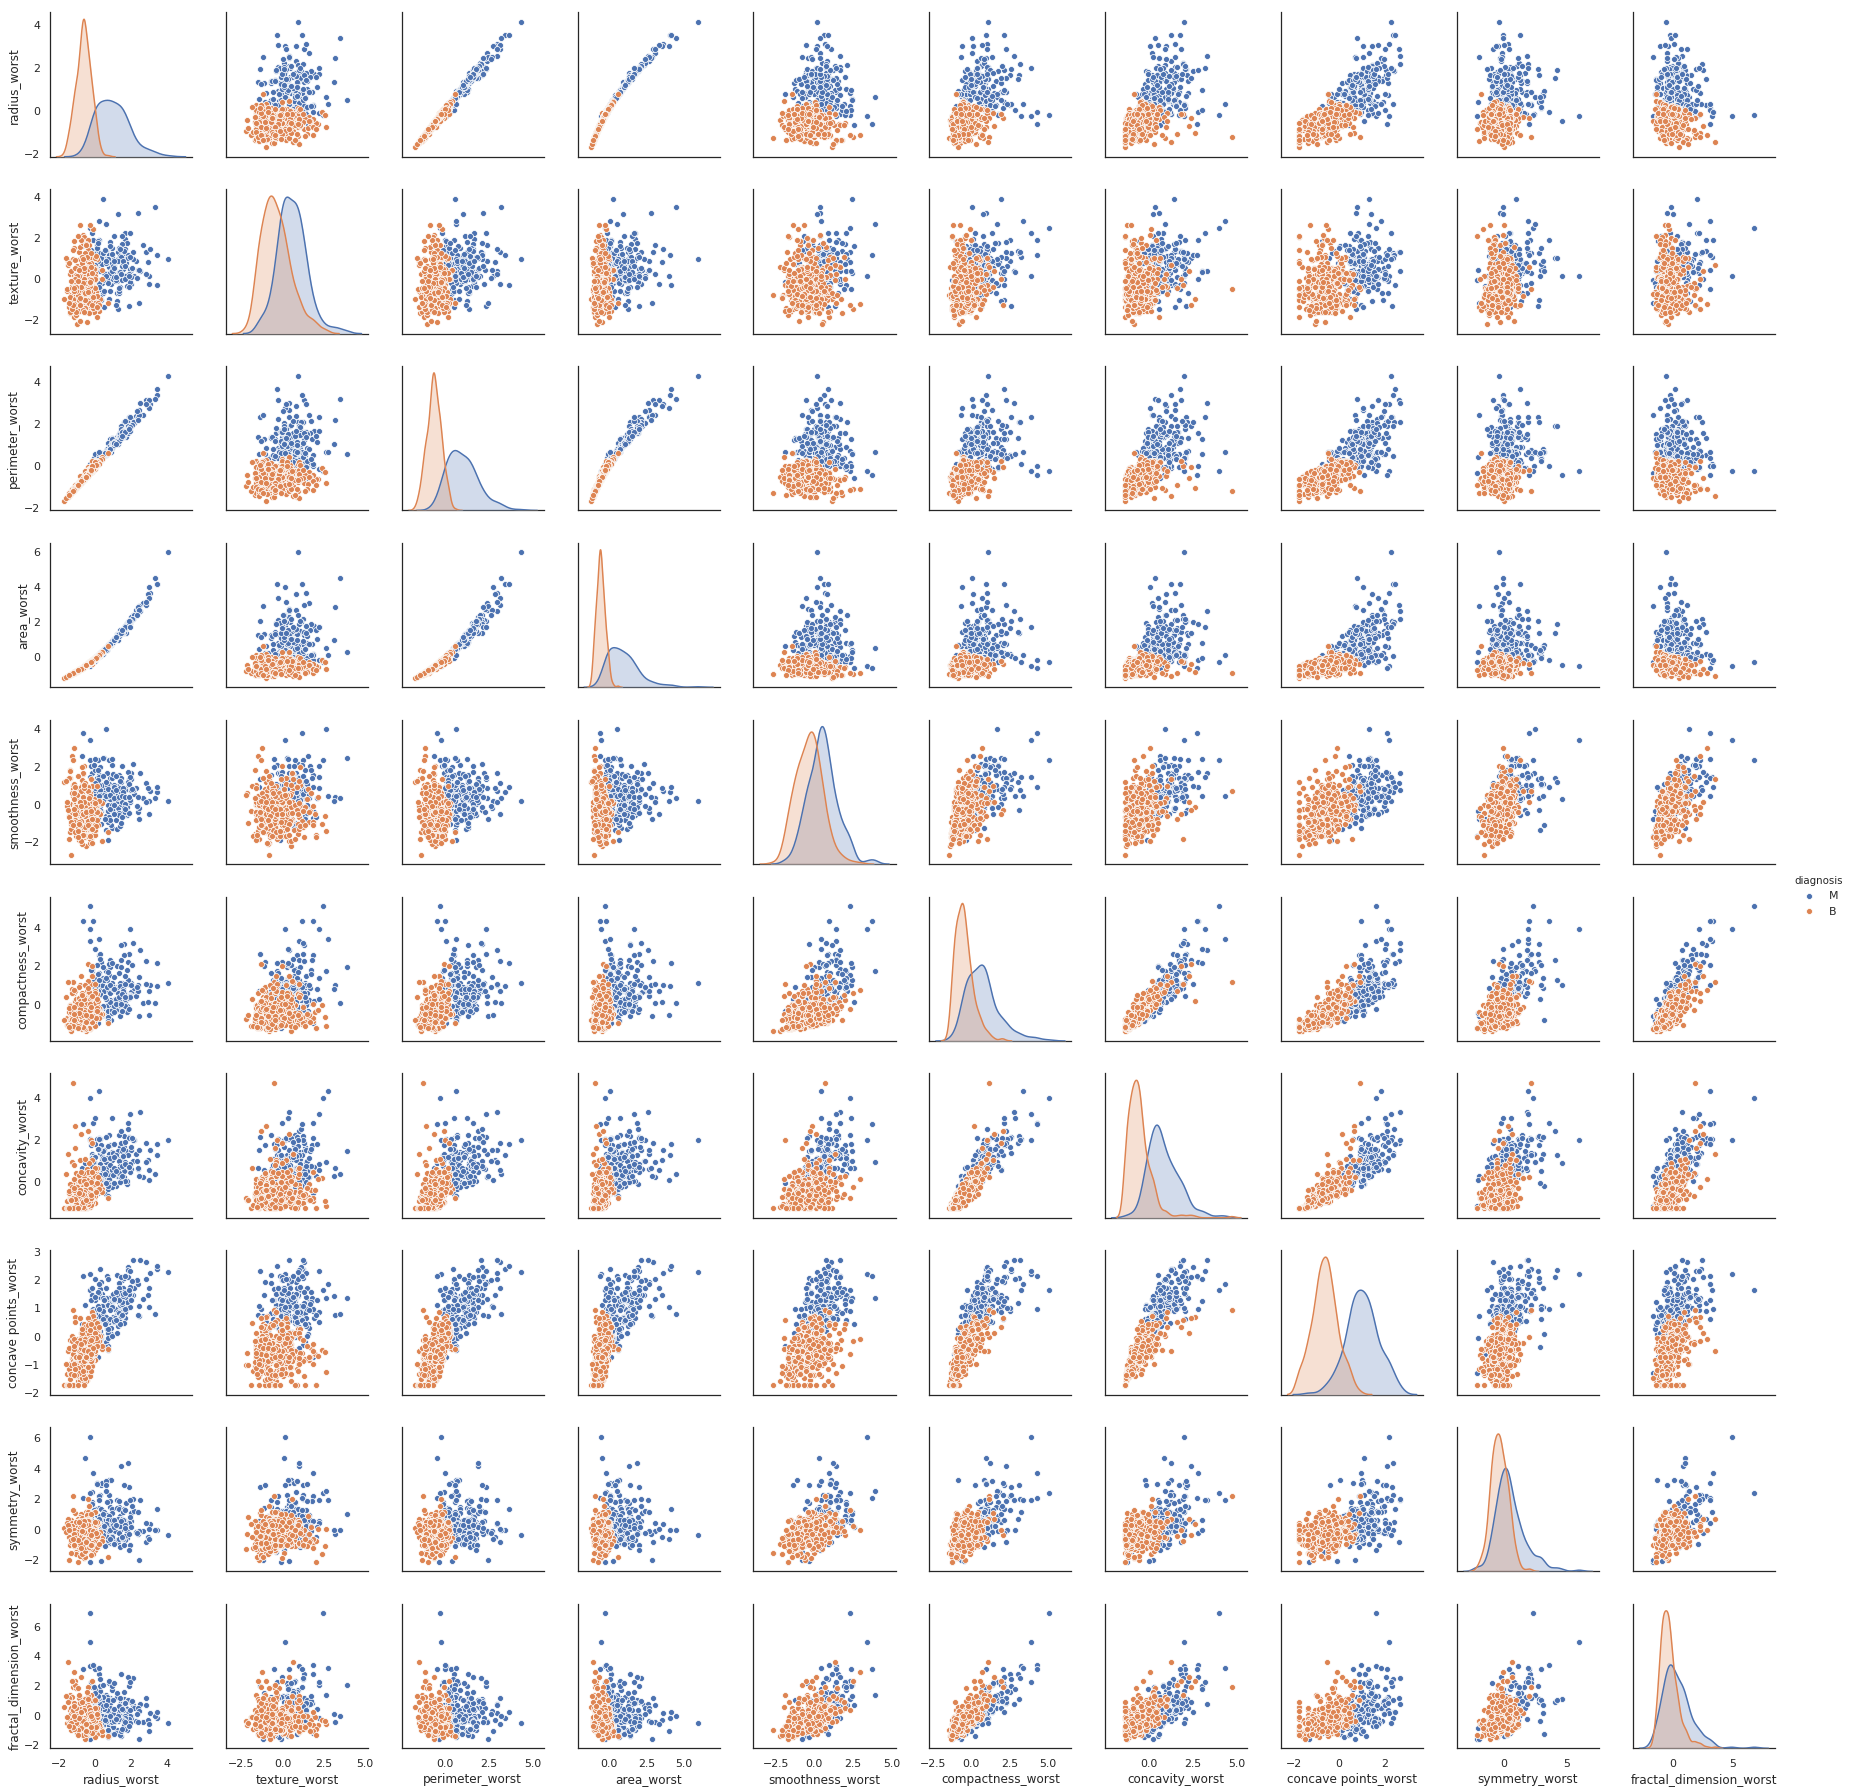

In [15]:
# pair plot diagnosis + 10 features (worst/largest)
sns.pairplot(data=data.iloc[:,np.append([0],np.arange(21,31))], hue='diagnosis', diag_kind='kde')

From these 3 last plottings, we can't realize a clear distinction in the class (diagnosis) against a given pair of numerical attributes. Let's try scatter plotting a given pair of attributes.

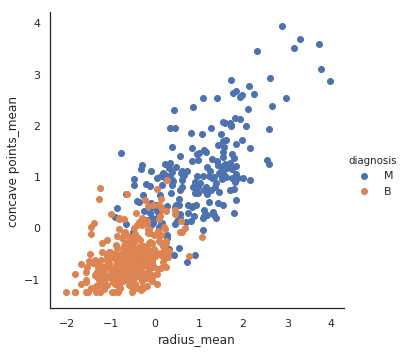

In [16]:
# scatter plotting radius (mean) versus concave points (mean)
sns.FacetGrid(data, hue='diagnosis', height=5) \
   .map(plt.scatter, 'radius_mean', 'concave points_mean') \
   .add_legend()

We still cannot define the distinction. Let's try box plotting another feature.

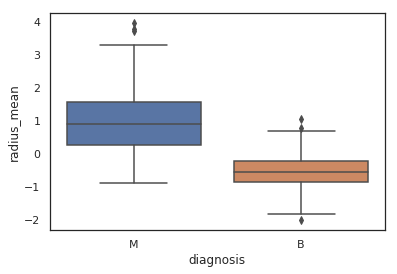

In [17]:
# box plotting diagnosis against radius (mean)
sns.boxplot(x='diagnosis', y='radius_mean', data=data)

Still confusing. Let's try an histogram based on these same attributes.

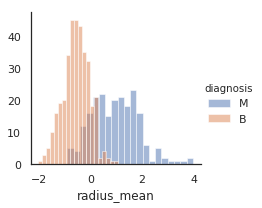

In [18]:
# create an histogram on radius (mean)
sns.FacetGrid(data, hue='diagnosis')\
   .map(plt.hist, 'radius_mean', alpha=.5, bins=20)\
   .add_legend()

There's a region in the middle where we can't define perfectly the class. Let's try it with another feature.

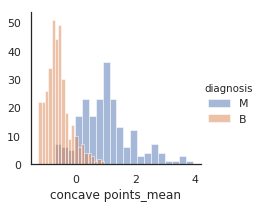

In [19]:
# create an histogram on concave points (mean)
sns.FacetGrid(data, hue='diagnosis')\
   .map(plt.hist, 'concave points_mean', alpha=.5, bins=20)\
   .add_legend()

The features alone definitely can't split the class (i.e., give a clue to the diagnosis). Therefore, we'll include every numeric feature in the model. 

In [20]:
# select the features
#X = data[data.columns[[1, 3, 4, 7, 8]]] # use only selected 5 features
X = data.iloc[:,1:] # use all numeric features
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.10,-2.07,1.27,0.98,1.57,3.28,2.65,2.53,2.22e+00,2.26,2.49,-0.57,2.83,2.49,-0.21,1.32,0.72,0.66,1.15,0.91,1.89,-1.36,2.30,2.00,1.31,2.62,2.11,2.30,2.75,1.94
1,1.83,-0.35,1.69,1.91,-0.83,-0.49,-0.02,0.55,1.39e-03,-0.87,0.50,-0.88,0.26,0.74,-0.61,-0.69,-0.44,0.26,-0.81,-0.10,1.81,-0.37,1.54,1.89,-0.38,-0.43,-0.15,1.09,-0.24,0.28
2,1.58,0.46,1.57,1.56,0.94,1.05,1.36,2.04,9.40e-01,-0.40,1.23,-0.78,0.85,1.18,-0.30,0.81,0.21,1.42,0.24,0.29,1.51,-0.02,1.35,1.46,0.53,1.08,0.85,1.96,1.15,0.20
3,-0.77,0.25,-0.59,-0.76,3.28,3.40,1.92,1.45,2.87e+00,4.91,0.33,-0.11,0.29,-0.29,0.69,2.74,0.82,1.12,4.73,2.05,-0.28,0.13,-0.25,-0.55,3.39,3.89,1.99,2.18,6.05,4.94
4,1.75,-1.15,1.78,1.83,0.28,0.54,1.37,1.43,-9.56e-03,-0.56,1.27,-0.79,1.27,1.19,1.48,-0.05,0.83,1.14,-0.36,0.50,1.30,-1.47,1.34,1.22,0.22,-0.31,0.61,0.73,-0.87,-0.40


In [21]:
# select the class column
y = data.diagnosis
y.tail()

564    M
565    M
566    M
567    M
568    B
Name: diagnosis, dtype: object

Let's start creating a model for the problem based on the data!

In [22]:
# importing packages used in model selection and metrics evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# importing all the necessary packages to use the various classification algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

First of all, let's split the data we handled so far in two sets: training and testing. The latter must contain fewer rows.

In [23]:
# separate data for training (70%) and testing (30%)

print('original data shapes:', X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('splitted data shapes:', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

original data shapes: (569, 30) (569,)
splitted data shapes: (398, 30) (171, 30) (398,) (171,)


Next, we'll instantiate each algorithm to be checked. We'll insert them in a single list.

In [24]:
# instantiate checking algorithms
models = []
models.append(('Support Vector Machines (SVM)', SVC()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('K-Nearest Neighbours (3)', KNeighborsClassifier(n_neighbors=3)))
models.append(('K-Nearest Neighbours (7)', KNeighborsClassifier(n_neighbors=7)))
models.append(('K-Nearest Neighbours (11)', KNeighborsClassifier(n_neighbors=11)))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Random Forest (10)', RandomForestClassifier(n_estimators=10)))
models.append(('Random Forest (100)', RandomForestClassifier(n_estimators=100)))
models.append(('Gaussian Naïve Bayes', GaussianNB()))
models.append(('Perceptron (5)', Perceptron(max_iter=5)))
models.append(('Perceptron (10)', Perceptron(max_iter=10)))
models.append(('Perceptron (50)', Perceptron(max_iter=50)))
models.append(('Stochastic Gradient Decent (SGD)', SGDClassifier(max_iter=50)))
models.append(('Linear SVC', LinearSVC()))

For each algorithm, let's perform the training, try predicting values, and then measure the model accuracy. A confusion matrix is to be calculated, as well as the number of False Negatives found.

In [25]:
names = []
scores = []
falnegs = []

best_model = None
highest_score = 0.0
false_negatives = None

for name, model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_pred, y_test)
    tn, fp, fn, tp = cm.ravel()
    print(name, '\n', cm, '\n')

    names.append(name)
    scores.append(score)
    falnegs.append(fn)

    if ((score > highest_score) or (score == highest_score and fn < false_negatives)):
        best_model = model
        highest_score = score
        false_negatives = fn
        
print('Best model:', best_model, '\n[Score: %.3f, False Negatives: %d]' % (highest_score, false_negatives))

Support Vector Machines (SVM) 
 [[105   2]
 [  3  61]] 

Logistic Regression 
 [[106   1]
 [  2  62]] 

Decision Tree 
 [[99  3]
 [ 9 60]] 

K-Nearest Neighbours (3) 
 [[105   4]
 [  3  59]] 

K-Nearest Neighbours (7) 
 [[105   4]
 [  3  59]] 

K-Nearest Neighbours (11) 
 [[106   5]
 [  2  58]] 

Random Forest 
 [[107   4]
 [  1  59]] 



/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest (10) 
 [[107   5]
 [  1  58]] 

Random Forest (100) 
 [[106   4]
 [  2  59]] 

Gaussian Naïve Bayes 
 [[103   6]
 [  5  57]] 

Perceptron (5) 
 [[104   2]
 [  4  61]] 

Perceptron (10) 
 [[108   1]
 [  0  62]] 

Perceptron (50) 
 [[105   2]
 [  3  61]] 

Stochastic Gradient Decent (SGD) 
 [[103   1]
 [  5  62]] 

Linear SVC 
 [[105   1]
 [  3  62]] 

Best model: Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=10, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False) 
[Score: 0.994, False Negatives: 0]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_i

In the end, this section will give us the best model found. We consider the higher accuracy and the fewer number of false negatives to chosse this model.

In [26]:
results = pd.DataFrame({'Model': names, 'Score': scores, 'FN': falnegs})
results.sort_values(by=['Score', 'FN'], ascending=[False, True])

,Model,Score,FN
11,Perceptron (10),0.99,0
1,Logistic Regression,0.98,2
14,Linear SVC,0.98,3
6,Random Forest,0.97,1
0,Support Vector Machines (SVM),0.97,3
12,Perceptron (50),0.97,3
7,Random Forest (10),0.96,1
8,Random Forest (100),0.96,2
10,Perceptron (5),0.96,4
13,Stochastic Gradient Decent (SGD),0.96,5


With the best model found, let's predict the values for the entire dataset and then print the score and the confusion matrix.

In [27]:
# consider the best algorithm found
model = best_model

# train the model with the training dataset
model.fit(X_train, y_train)

# calculate the score against the whole dataset
score = model.score(X, y)
print('Final score:', score)

# produce the confusion matrix
y_pred = model.predict(X)
print('Confusion matrix:\n', confusion_matrix(y_pred, y), '\n')

Final score: 0.9859402460456942
Confusion matrix:
 [[353   4]
 [  4 208]] 



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Finally, let's create a DataFrame containing a possible submission to the competition.

In [28]:
submission = pd.DataFrame({
  "ID": ids,
  "Diagnosis": y,
  "Predicted": y_pred,
  "Correct": (y == y_pred).map({True: 1, False: 0})
})
submission.head(10)

,ID,Diagnosis,Predicted,Correct
0,842302,M,M,1
1,842517,M,M,1
2,84300903,M,M,1
3,84348301,M,M,1
4,84358402,M,M,1
5,843786,M,M,1
6,844359,M,M,1
7,84458202,M,M,1
8,844981,M,M,1
9,84501001,M,M,1


If there is any incorrect classification, which were them?

In [29]:
# show the incorrectly classified cases

incorrectly = submission[submission["Correct"] == False]

incorrect = len(incorrectly.index)
total_cases = len(submission)
print('Incorrectly classified cases:', incorrect, \
      'of', total_cases, '(%.3f%%)' % (incorrect / total_cases))

incorrectly

Incorrectly classified cases: 8 of 569 (0.014%)


,ID,Diagnosis,Predicted,Correct
40,855167,M,B,0
73,859983,M,B,0
135,868202,M,B,0
157,8711216,B,M,0
225,88143502,B,M,0
297,892189,M,B,0
363,9010872,B,M,0
413,905557,B,M,0


False Negatives are unforgiven incorrect classifications for the given study. Which are they?

In [30]:
unforgiven_incorrectly = submission.query("Diagnosis == 'M' & Predicted == 'B'")
unforgiven_incorrectly.head()

,ID,Diagnosis,Predicted,Correct
40,855167,M,B,0
73,859983,M,B,0
135,868202,M,B,0
297,892189,M,B,0


The last thing: submitting the final file.

In [31]:
submission.to_csv("predicted.csv", index=False)